# 파일별 데이터 프레임화

In [1]:
import pandas as pd
import glob ,os

path = r'C:\Users\Tony\Desktop\3-2기말\비주얼 기말\프로젝트\Squid game_reviews\Squid game_reviews\reviews\review'                     
# path로 지정한 디렉토리 밑에 있는 모든 .txt 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.txt"))    
filename_list = [] # 개별 파일들의 파일명은 filename_list 리스트로 취합, 
review_text = []
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 df생성
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    print(df)
    # 절대경로로 주어진 file 명을 가공
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    review_text.append(df.to_string())
# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'review_text':review_text})
document_df.head()

  Just finished up SQUID GAME, the Korean TV show that's become a global smash hit on Netflix
0   It's truly brilliant and even better than the...                                         
1   Shades of SAW and THE HUNGER GAMES here, but ...                                         
2   As usual for Korea, the writing, acting, and ...                                         
3   Definitely horrifying enough both in premise ...                                         
4                      67 out of 144 found this h...                                         
5                              Was this review he...                                         
6                                          Permalink                                         
   Well multiple games actually, but even that you may find 
0                                        not accurate       
1    Now you may not look the same way at some gam...       
2    But with all the buzz right now, you've proba...       
3   

                       and I couldn't even finish it
0  Maybe it gets good; I don't know, as it has so...
1                        I just know it's not for me
2  The main character is so unlikeable that I don...
3                      Maybe he grows as a character
4  he probably does, but I don't care enough to s...
5                         The acting is over the top
6   The main character pulls faces every two minutes
7   I've seen better acting in high school plays,...
8  If I ever watch the rest I'll come back and wr...
         I feel conflicted after finishing the series
0    After watching the 3rd episode I was hooked! ...
1    At this moment I'm not sure exactly when it s...
2    I agree with others, the VIPs were awful and ...
3    And regardless of how much you are into the g...
4            The final episode was very disappointing
5    After winning the game, they throw him uncons...
6    I don't understand why they would stuff the b...
7                                     

  Overrall it is a good show and the only concern i had was the acting it felt so cringy and annoying at the same time and i skipped so many scenes bcz of very poor acting
0                      0 out of 3 found this helpful                                                                                                                       
1                              Was this review he...                                                                                                                       
2                                          Permalink                                                                                                                       
         I saw this drama cause I am a Kdrama lover 
0                              But it was not for me
1   From the first till the last episode was repr...
2   Sexual, verbal ,physical, just plain, coarse ...
3   Absolutely not reccomended to everyone under ...
4  Regarding the plot , there was some parts wi

  While the series deserves its enthusiastic reception for creating a tense atmosphere - although it seriously drops off towards the end, so don't expect too much -, the premise and story heavily borrow from the manga "Gambling Apocalypse Kaiji", which has been running from 1996
0   It's been adapted various times, first as an ...                                                                                                                                                                                                                                   
1   Which is when director Hwang Dong-hyuk admitt...                                                                                                                                                                                                                                   
2  The similarities are too obvious to be ignored...                                                                                                            

,filename,review_text
0,0,...
1,1,...
2,10,...
3,100,"As survival series go, ""Squid Game"" brought..."
4,101,...


In [2]:
document_df['filename']=document_df['filename'].astype(int)
document_df=document_df.sort_values(by='filename')
document_df.reset_index(inplace=True, drop=True)

In [3]:
document_df

,filename,review_text
0,0,...
1,1,...
2,2,...
3,3,...
4,4,I honestly don't know wtf the main character...
...,...,...
259,288,...
260,301,Not original at all but refreshing to see th...
261,316,...
262,331,It is disturbing in a way that why the hell ...


# 파일 몇개 살펴봄

## 특징 
## 1) 데이터에 \n정수값이 들어가서 연속적으로 있음 -> 리뷰길이상 100이상은 없음
## 2) n명중 x명이 공감했다는 글귀가 있음
## 3) Permalink도 있음


## 처리 계획
## 1) \n정수 이렇게 들어가는 문자를 전부 제거할 것이다.
## 2) n명중 x명이 공감 -> n은 조회수 column으로 x는 공감 column으로 데이터 프레임 만들것임
## 3) 다수공백이나 특수문자 처리 -> 다수공백 word_tokenize함수가 공백 알아서 처리해줌, 특수문자는 lemmatization함수를 나중에 구현하여 벡터화함수의 파라미터로 넣을 것임

In [4]:
document_df['review_text'][0]

"                                                                                                                                           Just finished up SQUID GAME, the Korean TV show that's become a global smash hit on Netflix\n0   It's truly brilliant and even better than the similar Japanese show ALICE IN BORDERLAND! The show is centred around contestants competing in children's games for a cash prize, but the twist is that they get killed if they lose\n1                                                                                                                        Shades of SAW and THE HUNGER GAMES here, but this is rivalled only by BATTLE ROYALE in terms of sheer quality\n2                                                                              As usual for Korea, the writing, acting, and direction are all superb and the games themselves are hugely suspenseful, unlike anything I've seen before\n3                                                                      

# 1) \n정수 이렇게 되어있는 값을 지우는 함수 작성
### wordtokenize가 \n 혹은 공백은 인지하지만 뒤의 정수를 지워주지 못함 따라서 함수를 따로 만들었음
### 두자릿수까지 나올 수 있음 -> 99부터 반복문 작성
### \n뒤의 정수들이 배열에 그대로 들어가는 것을 볼 수 있음

## wordtokenize

In [5]:
from nltk.tokenize import word_tokenize
print('단어 토큰화1 :',word_tokenize(document_df['review_text'][0]))

단어 토큰화1 : ['Just', 'finished', 'up', 'SQUID', 'GAME', ',', 'the', 'Korean', 'TV', 'show', 'that', "'s", 'become', 'a', 'global', 'smash', 'hit', 'on', 'Netflix', '0', 'It', "'s", 'truly', 'brilliant', 'and', 'even', 'better', 'than', 'the', 'similar', 'Japanese', 'show', 'ALICE', 'IN', 'BORDERLAND', '!', 'The', 'show', 'is', 'centred', 'around', 'contestants', 'competing', 'in', 'children', "'s", 'games', 'for', 'a', 'cash', 'prize', ',', 'but', 'the', 'twist', 'is', 'that', 'they', 'get', 'killed', 'if', 'they', 'lose', '1', 'Shades', 'of', 'SAW', 'and', 'THE', 'HUNGER', 'GAMES', 'here', ',', 'but', 'this', 'is', 'rivalled', 'only', 'by', 'BATTLE', 'ROYALE', 'in', 'terms', 'of', 'sheer', 'quality', '2', 'As', 'usual', 'for', 'Korea', ',', 'the', 'writing', ',', 'acting', ',', 'and', 'direction', 'are', 'all', 'superb', 'and', 'the', 'games', 'themselves', 'are', 'hugely', 'suspenseful', ',', 'unlike', 'anything', 'I', "'ve", 'seen', 'before', '3', 'Definitely', 'horrifying', 'enough',

In [6]:
def delenter(data):
    loc=data.find('\n')#데이터의 \n으로 바꾸기 위해 저장
    for i in range(99,-1,-1):
        part=data[loc]
        target=part+str(i) # \n정수 이렇게 targe값이 만들어짐
        if(data.find(target)!=-1): #target이 있으면 삭제시킴
            data=data.replace(target,'')
    data=data.replace('\'','')#텍스트100의 문제
    return data

In [7]:
delenter(document_df['review_text'][100])

'   As survival series go, "Squid Game" brought with it something familiar - a game-show setting with a mindblowing cash prize for the winner - and infused it with a "Hunger Games", "Saw", and other story-telling flavours that felt human in several regards                                                                                                        The show made me genuinely feel for and think about the people involved instead of just watching them go through what they did like an inert spectator                                                                                                                                                                                   The stakes were high, but so were the perils - especially of the moral kind                                                                                                   The parts where they delved into the Human psyche and captured multiple facets of what different kinds of people are willing to do to win

In [8]:
new=delenter(document_df['review_text'][0])
new

'                                                                                                                                           Just finished up SQUID GAME, the Korean TV show thats become a global smash hit on Netflix   Its truly brilliant and even better than the similar Japanese show ALICE IN BORDERLAND! The show is centred around contestants competing in childrens games for a cash prize, but the twist is that they get killed if they lose                                                                                                                        Shades of SAW and THE HUNGER GAMES here, but this is rivalled only by BATTLE ROYALE in terms of sheer quality                                                                              As usual for Korea, the writing, acting, and direction are all superb and the games themselves are hugely suspenseful, unlike anything Ive seen before                                                                                      

# 2) n명중 n명이 공감했다는 글귀 -> Column으로 조회수, 공감자수 뽑아내고 데이터 상에서 삭제 시킬것임 -> 만약에 없으면 0을 집어 넣는다.

# makeview 개선

In [9]:
import numpy as np
views=[]
def makeviews(data):
    global views
    loc=data.rfind("out of")# out of는 문장구조상 나올 수도 있지만 앞에 정수가 붙어서 나오면 거의 100퍼센트 확실하다고 보았다.
    if(loc!=-1):
        temp=[]
        loc+=7# 공백 포함해서 제일 뒷숫자 찾기
        if(48<=ord(data[loc])<=57):# 만약 뒷자리 수가 정수라면 위치 하나씩 늘리면서 뒷칸으로 이동시킴
            while((48<=ord(data[loc])<=57) & (loc<=len(data)-2)): #만약 0~9사이 정수면 temp배열에 추가 & loc가 데이터의 끝 직전까지반복
                temp.append(data[loc])
                loc+=1
            org=""
            temp.reverse()# reverse해주어야 선입선출구조로 뽑을 수 있음
            for i in range(0,len(temp)): # 배열에 저장한거 pop으로 빼서 문자열로 만들어 주면 원래 숫자의 형태로 나온다.
                  org+=temp.pop()
            print(org)
            views.append(int(org))
            return data
        else:# 만약 뒷자리수가 정수 아니면 문장 구조상의 out of다 따라서 append np.nan해줌
            views.append(np.nan)
            return data
    else:
        views.append(np.nan)
        return data

# makeempathy 개선

In [10]:
empathy=[]
def makeempathy(data):
    global empathy
    loc=data.rfind("out of")# out of는 문장구조상 나올 수도 있지만 앞에 정수가 붙어서 나오면 거의 100퍼센트 확실하다고 보았다.
    if(loc!=-1):
        temp=[]
        loc-=2# 공백 포함해서 제일 뒷숫자 찾기
        if(48<=ord(data[loc])<=57):# 만약 앞자리 수가 정수라면
            while(48<=ord(data[loc])<=57): #위치 하나씩 줄이면서 앞칸으로 이동시킴 만약 0~9사이 정수면 temp배열에 추가
                  temp.append(data[loc])
                  loc-=1
            org=""
            for i in range(0,len(temp)): # 배열에 저장한거 pop으로 빼서 문자열로 만들어 주면 원래 숫자의 형태로 나온다.
                  org+=temp.pop()
            print(org)
            empathy.append(int(org))
            data=data[:loc] #뒤에 전부제거
            return data
        else:# 만약 앞자리수가 정수 아니면 문장 구조상의 out of다 따라서 append 0해줌
            empathy.append(np.nan)
            return data
    else:
        empathy.append(np.nan)
        return data

# 최종구현

In [11]:
document_df['review_text']=document_df['review_text'].apply(delenter)

In [12]:
document_df['review_text'][0]

'                                                                                                                                           Just finished up SQUID GAME, the Korean TV show thats become a global smash hit on Netflix   Its truly brilliant and even better than the similar Japanese show ALICE IN BORDERLAND! The show is centred around contestants competing in childrens games for a cash prize, but the twist is that they get killed if they lose                                                                                                                        Shades of SAW and THE HUNGER GAMES here, but this is rivalled only by BATTLE ROYALE in terms of sheer quality                                                                              As usual for Korea, the writing, acting, and direction are all superb and the games themselves are hugely suspenseful, unlike anything Ive seen before                                                                                      

In [13]:
document_df['review_text']=document_df['review_text'].apply(makeviews)

144
61
54
228
271
20
41
2
112
61
146
72
62
12
70
32
13
91
41
26
46
198
53
46
23
26
58
39
16
16
32
8
119
32
5
27
9
18
0
24
24
22
14
24
32
22
16
49
9
12
23
60
95
28
31
8
6
29
22
8
17
10
11
3
7
7
1
15
18
0
33
18
43
11
15
5
84
29
12
53
5
8
12
33
11
14
11
2
1
10
29
17
7
5
10
10
8
6
54
186
7
5
12
5
7
5
3
7
11
19
2
4
83
2
3
5
14
7
3
6
2
8
4
6
6
5
9
11
95
8
3
1
2
12
9
10
0
7
5
8
10
15
5
8
8
6
8
3
12
8
7
5
2
4
8
16
12
4
60
2
7
3
142
9
6
5
7
19
4
14
3
3
14
4
6
10
7
0
8
20
26
2
1
1
7
17
5
4
4
6
26
81
1
8
3
14
5
4
10
3
1
5
1
5
5
2
34
3
7
3
9
0
40
0
0
1
7
61
4
3
7
7
5
15
4
3
3
9
26
4
17


In [14]:
document_df['review_text']=document_df['review_text'].apply(makeempathy)

67
34
21
188
179
2
8
2
51
22
71
34
17
9
24
13
2
61
18
13
19
81
29
28
5
7
21
12
1
3
9
1
88
7
2
12
2
12
0
13
9
15
2
11
14
14
5
38
4
0
6
28
42
7
11
1
2
7
15
4
5
5
1
0
2
2
0
3
3
0
16
4
30
0
3
0
59
22
3
42
0
2
6
25
5
1
3
1
5
2
18
4
2
0
3
4
8
3
35
137
3
2
3
2
3
2
1
4
8
13
1
2
66
0
1
1
5
2
1
5
0
3
1
4
3
0
3
4
55
5
1
0
0
5
3
3
0
2
4
2
3
8
3
2
1
3
3
1
2
4
5
1
1
1
2
7
9
2
26
1
2
0
50
5
4
2
2
11
1
5
1
0
8
3
2
5
3
0
6
10
16
1
1
1
3
9
2
2
1
4
11
48
0
5
3
9
3
2
9
0
0
2
1
2
3
1
24
1
3
2
5
0
27
0
0
1
4
29
3
0
4
4
3
6
2
2
0
2
17
2
5


# 길이가 전부 동일해야함

In [15]:
len(views)

264

In [16]:
len(empathy)

264

In [17]:
len(document_df)

264

In [18]:
document_df['views']=views
document_df

,filename,review_text,views
0,0,...,144.0
1,1,...,61.0
2,2,...,54.0
3,3,...,NaN
4,4,I honestly dont know wtf the main character ...,228.0
...,...,...,...
259,288,...,3.0
260,301,Not original at all but refreshing to see th...,9.0
261,316,...,26.0
262,331,It is disturbing in a way that why the hell ...,4.0


In [19]:
document_df['empathy']=empathy
document_df

,filename,review_text,views,empathy
0,0,...,144.0,67.0
1,1,...,61.0,34.0
2,2,...,54.0,21.0
3,3,...,NaN,NaN
4,4,I honestly dont know wtf the main character ...,228.0,188.0
...,...,...,...,...
259,288,...,3.0,0.0
260,301,Not original at all but refreshing to see th...,9.0,2.0
261,316,...,26.0,17.0
262,331,It is disturbing in a way that why the hell ...,4.0,2.0


In [20]:
document_df

,filename,review_text,views,empathy
0,0,...,144.0,67.0
1,1,...,61.0,34.0
2,2,...,54.0,21.0
3,3,...,NaN,NaN
4,4,I honestly dont know wtf the main character ...,228.0,188.0
...,...,...,...,...
259,288,...,3.0,0.0
260,301,Not original at all but refreshing to see th...,9.0,2.0
261,316,...,26.0,17.0
262,331,It is disturbing in a way that why the hell ...,4.0,2.0


# 상위 25% 데이터 추출

# 사전 전처리 -> views와 empathy의 결측치
## 같은 행이 NA값임 잘 처리됨
## 결측치는 전체 데이터의 12.5%(33/264*100)
## 어떻게 NA값이 나왔을까 -> 정수 out of 정수 규칙이 성립하지 않음(저런문구 자체가 없음)
## IMDB사이트 확인해보니 -> 최근에 올린 글조자 0 out of 0이 있음 
## 크롤링과정에서의 문제로 보임

In [22]:
len(document_df[document_df['views'].isna()])

33

# NA값 처리
# if 상위 공감비율은 긍정이 많을까?
# 1) document_df의 복사본 test 생성 + 일단 결측치 제거
# 2) 공감비율 column생성

# 사분위수의 개념 설명
# 3) 상위 25프로의 공감비율의 긍/부정 여부 시각화 + 상관관계 확인
# 4) 하위 25프로의 공감비율의 긍/부정 여부 시각화 + 상관관계 화인 

# Vader 기반 감성분석 column 생성
# threshold 0.4 설정 -> 긍정에 조금 더 엄격하게 -> 부정 데이터의 비율이 너무 적었음

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [24]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

document_df['Sentiment']=document_df['review_text'].apply(lambda x: vader_polarity(x, 0.4))

In [25]:
document_df

,filename,review_text,views,empathy,Sentiment
0,0,...,144.0,67.0,0
1,1,...,61.0,34.0,1
2,2,...,54.0,21.0,1
3,3,...,NaN,NaN,1
4,4,I honestly dont know wtf the main character ...,228.0,188.0,1
...,...,...,...,...,...
259,288,...,3.0,0.0,1
260,301,Not original at all but refreshing to see th...,9.0,2.0,1
261,316,...,26.0,17.0,0
262,331,It is disturbing in a way that why the hell ...,4.0,2.0,0


In [48]:
document_df['Sentiment'].value_counts()

1    176
0     88
Name: Sentiment, dtype: int64

In [32]:
test_df=document_df.copy()

In [33]:
test_df=test_df.dropna()

In [35]:
test_df['EV']=test_df['empathy']/test_df['views']*100

In [36]:
test_df=test_df.dropna()

In [37]:
test_df['EV'].quantile([.75])

0.75    57.894737
Name: EV, dtype: float64

In [39]:
high=test_df[test_df['EV']>=57.894737]

In [40]:
high['Sentiment'].value_counts()

0    31
1    24
Name: Sentiment, dtype: int64

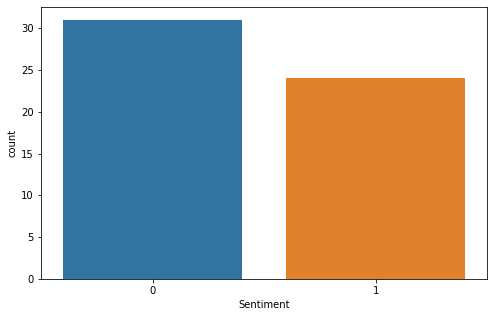

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5)) #확대 조정 가능
sns.countplot(data=high, x='Sentiment')
plt.savefig('HighSentiment.png')

In [44]:
test_df['EV'].quantile([.25])

0.25    26.714047
Name: EV, dtype: float64

In [45]:
low=test_df[test_df['EV']<=26.714047]

In [46]:
low['Sentiment'].value_counts()

1    43
0    13
Name: Sentiment, dtype: int64

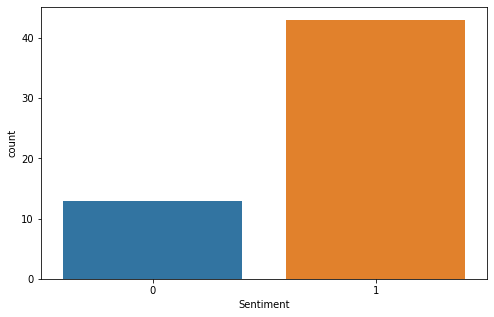

In [47]:
plt.figure(figsize=(8,5)) #확대 조정 가능
sns.countplot(data=low, x='Sentiment')
plt.savefig('LowSentiment.png')

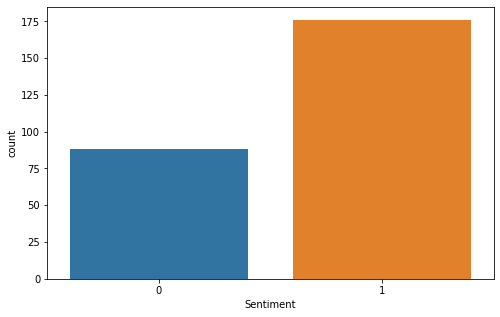

In [50]:
plt.figure(figsize=(8,5)) #확대 조정 가능
sns.countplot(data=document_df, x="Sentiment")
plt.savefig('ALLSentiment.png')

# 파일명과 해당 'SV' 값 시각화, 감성으로 구별

<AxesSubplot:xlabel='filename', ylabel='SV'>

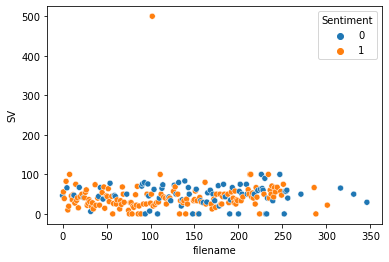

In [39]:
sns.scatterplot(data=test_df, x="filename", y="EV", hue="Sentiment")

# 긍정의 평균 조회수대 공감비율 vs 부정의 평균 조회수대공감비율
### 부정이 평균적으로 더 높았다.

In [51]:
test_df[test_df['Sentiment']==1]['EV'].mean()

42.4378070063707

In [52]:
test_df[test_df['Sentiment']==0]['EV'].mean()

48.204215856830395

In [53]:
means=pd.DataFrame({'1':[test_df[test_df['Sentiment']==1]['EV'].mean()], '0':[test_df[test_df['Sentiment']==0]['EV'].mean()]})

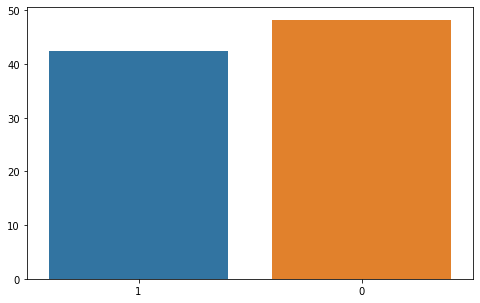

In [55]:
plt.figure(figsize=(8,5)) #확대 조정 가능
sns.barplot(data=means)
plt.savefig('Mean.png')

# 긍정의 조회수대 공감비율 중앙값 vs 부정의 평균 조회수대공감비율 중앙값
### 부정이 더 높음

In [56]:
test_df[test_df['Sentiment']==1]['EV'].median()

37.5

In [57]:
test_df[test_df['Sentiment']==0]['EV'].median()

50.0

In [58]:
medians=pd.DataFrame({'1':[test_df[test_df['Sentiment']==1]['EV'].median()], '0':[test_df[test_df['Sentiment']==0]['EV'].median()]})

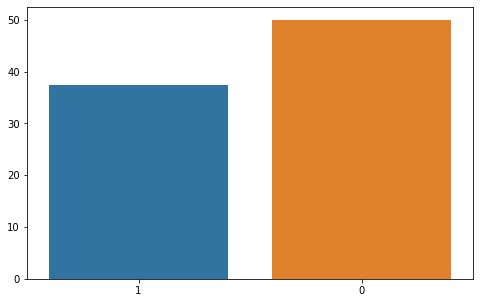

In [60]:
plt.figure(figsize=(8,5)) #확대 조정 가능
sns.barplot(data=medians)
plt.savefig('Median.png')

# 수치적으로 설명가능한 근거가 더 필요함

# 조회수 대비 공감 비율 과 (긍정수치, 부정수치) 선형관계 성립 여부

# 1) 상관관계 확인

In [61]:
def makep(data):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(data)
    return scores['pos']
def maken(data):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(data)
    return scores['neg']


In [62]:
test_df['pos']=test_df['review_text'].apply(makep)
test_df['neg']=test_df['review_text'].apply(maken)

In [63]:
test_df

,filename,review_text,views,empathy,Sentiment,EV,pos,neg
0,0,...,144.0,67.0,0,46.527778,0.114,0.218
1,1,...,61.0,34.0,1,55.737705,0.229,0.000
2,2,...,54.0,21.0,1,38.888889,0.193,0.055
4,4,I honestly dont know wtf the main character ...,228.0,188.0,1,82.456140,0.138,0.000
5,5,I loved it but three las...,271.0,179.0,0,66.051661,0.156,0.398
...,...,...,...,...,...,...,...,...
259,288,...,3.0,0.0,1,0.000000,0.161,0.060
260,301,Not original at all but refreshing to see th...,9.0,2.0,1,22.222222,0.237,0.038
261,316,...,26.0,17.0,0,65.384615,0.085,0.089
262,331,It is disturbing in a way that why the hell ...,4.0,2.0,0,50.000000,0.075,0.238


In [64]:
corr_df=test_df.drop(columns=['filename','review_text','Sentiment','views','empathy'])

In [65]:
corr_df=corr_df.corr()

In [66]:
corr_df

,EV,pos,neg
EV,1.000000,-0.137658,0.084907
pos,-0.137658,1.000000,-0.412925
neg,0.084907,-0.412925,1.000000


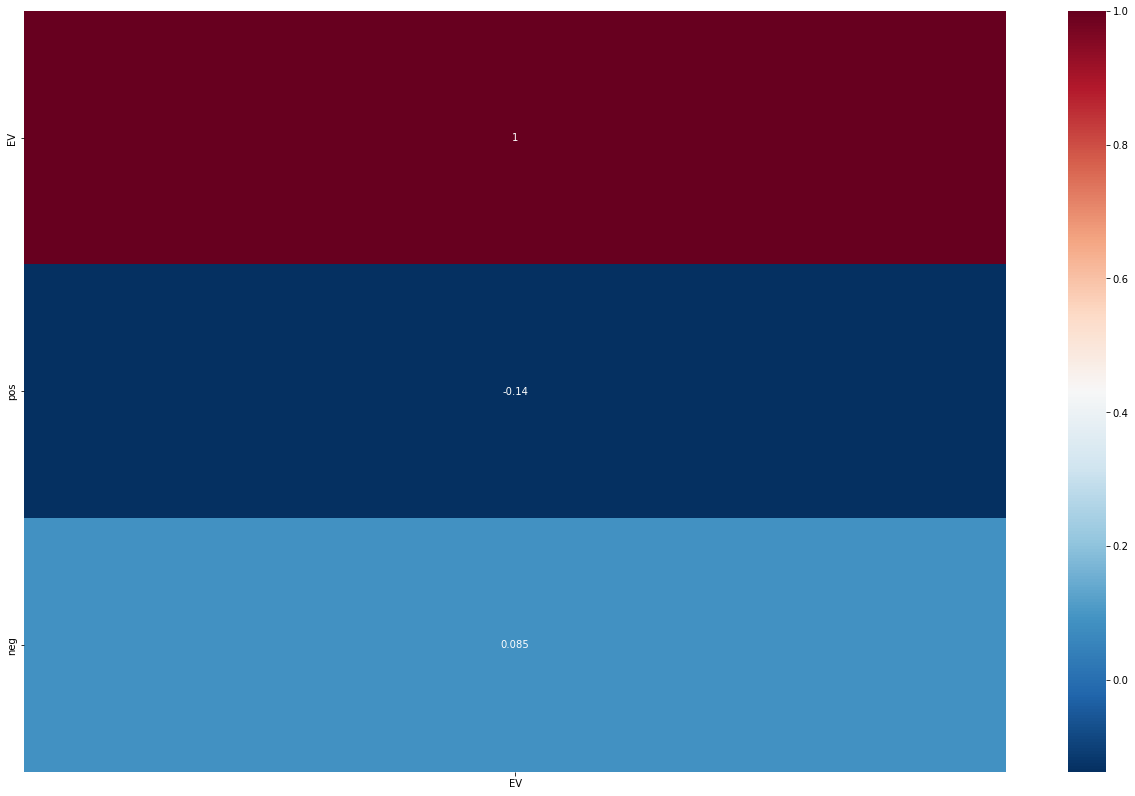

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,14))
k=sns.heatmap(corr_df[['EV']],annot=True,cmap='RdBu_r')
fg=k.get_figure()
plt.savefig('Corr.png')

# 2) linearRegression, Ridge, Rasso R^2확인
## 마이너스 값이나옴 -> 평균으로 예측한거보다 성능이 안좋다(전혀 선형관계가 나오지않음)

In [70]:
linear_df=test_df.drop(columns=['filename','review_text','Sentiment','views','empathy'])

In [71]:
linear_df

,EV,pos,neg
0,46.527778,0.114,0.218
1,55.737705,0.229,0.000
2,38.888889,0.193,0.055
4,82.456140,0.138,0.000
5,66.051661,0.156,0.398
...,...,...,...
259,0.000000,0.161,0.060
260,22.222222,0.237,0.038
261,65.384615,0.085,0.089
262,50.000000,0.075,0.238


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
def mkscore(clf, X_test, y_test):
    y_pred=clf.predict(X_test)
    mse = mean_squared_error(y_pred,y_test)
    rmse = np.sqrt(mse)
    print(str(clf)+'MSE : {0:.3F}, RMSE:{1:.3F}'.format(mse,rmse))
    print(str(clf)+'R2 score : {0:.3f}'.format(r2_score(y_pred, y_test)))
def simplemodel(df):
    X=df.loc[:,df.columns !="EV"]
    y=df.loc[:,df.columns =="EV"]
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
    ridge = Ridge()
    lasso = Lasso()
    lr = LinearRegression()
    ridge.fit(X_train,y_train)
    lasso.fit(X_train,y_train)
    lr.fit(X_train, y_train)
    mkscore(lr,X_test, y_test)
    mkscore(ridge, X_test, y_test)
    mkscore(lasso, X_test, y_test)

In [75]:
simplemodel(linear_df)

LinearRegression()MSE : 460.227, RMSE:21.453
LinearRegression()R2 score : -20.184
Ridge()MSE : 471.847, RMSE:21.722
Ridge()R2 score : -45.872
Lasso()MSE : 510.996, RMSE:22.605
Lasso()R2 score : 0.000


# 결과 
# 1) 조회수 대비 공감의 비율이 상위권인 그룹은 부정의 비율이 더 많았다. 반면 하위권인 그룹은 긍정의 비율이 더많았다.

# 2) 긍정의 평균 조회수대 공감비율이 부정보다 높았다.

# 3) 긍정의 조회수대 공감비율의 중앙값이 부정보다 높았다.

# 데이터의 총비율이 1이 0보다 더많은것을 고려했을 때 의미있는 규칙으로 보여짐

# 긍정과 부정의 수치와는 조회수 대비 공감비율은 상관관계, 선형관계가 없어보임

# 데이터 수가 적어서 합리적인 선택이라 보기는 어렵지만 진행
# sentiment를 고려하여 조회수 대비 공감 column의 결측치를 채운다.
# sentiment=0의 결측치 -> 0인집단의 중앙값으로 채움
# sentiment=1의 결측치 -> 1인집단의 중앙값으로 채움

# 1) 0/0이 NA로 채워진 부분은 0으로 채운다.(처음부터 0으로 초기화 함)
# 2) 나머지 NA는 긍정, 부정 그륩의 중앙값으로 채운다.

In [76]:
document_df['EV']=document_df['empathy']/document_df['views']*100

In [77]:
document_df['EV']=np.where((document_df['views']==0) & (document_df['empathy']==0), 0, document_df['EV'])

In [78]:
document_df[(document_df['views']==0) & (document_df['empathy']==0)]

,filename,review_text,views,empathy,Sentiment,EV
44,44,...,0.0,0.0,1,0.0
82,82,Watched the whole thing in a day after heari...,0.0,0.0,1,0.0
159,159,...,0.0,0.0,0,0.0
207,207,Its really n...,0.0,0.0,1,0.0
243,243,Standard down on their luck beginning of cha...,0.0,0.0,0,0.0
245,245,...,0.0,0.0,0,0.0
246,246,But then I saw the American actors that play...,0.0,0.0,0,0.0


In [79]:
document_df[document_df['EV'].isna()]

,filename,review_text,views,empathy,Sentiment,EV
3,3,...,NaN,NaN,1,NaN
9,9,...,NaN,NaN,1,NaN
21,21,...,NaN,NaN,1,NaN
23,23,...,NaN,NaN,0,NaN
36,36,...,NaN,NaN,1,NaN
39,39,...,NaN,NaN,1,NaN
49,49,...,NaN,NaN,1,NaN
55,55,...,NaN,NaN,1,NaN
63,63,I guess I got sucked into...,NaN,NaN,1,NaN
64,64,While the series deserves its enthusiastic r...,NaN,NaN,1,NaN


In [80]:
Po=test_df[test_df['Sentiment']==1] # 테스트 데이터 긍정그룹(결측치 전부 제거한 값)

In [81]:
Ne=test_df[test_df['Sentiment']==0] # 테스트 데이터 부정그룹(결측치 전부 제거한 값)

In [82]:
import numpy as np
document_df['EV']=np.where((document_df['Sentiment']==1)&(document_df['EV'].isna()==True), Po['EV'].median(), document_df['EV'])
document_df['EV']=np.where((document_df['Sentiment']==0)&(document_df['EV'].isna()==True), Ne['EV'].median(), document_df['EV']) 

In [83]:
document_df[document_df['EV'].isna()]

,filename,review_text,views,empathy,Sentiment,EV


# 전체 텍스트 대상 군집화 수행(테스트 용)

In [84]:
from nltk.corpus import stopwords 

In [85]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [86]:
from nltk.stem import WordNetLemmatizer
import nltk
import string
remove_punct_dict=dict((ord(punct), None) for punct in string.punctuation) # it/is/great/./ 여기서 .을 뺀다.
lemmar = WordNetLemmatizer()
g=['1','10','2','3','4','5','6','7','9','absolutely','already','also','another','didnt','doe','doesnt',
'dont','game wa','ha','im','wa','without','arent', 'couldnt', 'game', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 
   'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'would', 'wouldnt', 'youd', 'youll', 'youre', 'youve','cant','maybe','u','ive','get','like','almost',
  'one','yet', 'thing', 'thats', 'something', 'really', 'one', 'never', 'many', 'got','keep','much', 'new']
for i in g:
    stop_words.append(i)
def LemTokens(tokens):#입력으로 들어온 token단어들에 대해 lemmatization 어근 변환
    return [lemmar.lemmatize(token) for token in tokens]
def LemNormalize(text): # tokenize한다 -> 1) 소문자로 먼저 만든다 -> 2)
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [87]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words=stop_words, ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['review_text'])

In [89]:
o=tfidf_vect.get_feature_names()

C:\Users\Tony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [90]:
len(o)

183

In [91]:
o

['acting',
 'actor',
 'alice',
 'amazing',
 'american',
 'around',
 'away',
 'back',
 'bad',
 'battle',
 'become',
 'believe',
 'best',
 'better',
 'big',
 'binge',
 'bit',
 'care',
 'cast',
 'character',
 'character development',
 'come',
 'concept',
 'could',
 'day',
 'death',
 'debt',
 'definitely',
 'development',
 'die',
 'different',
 'done',
 'drama',
 'emotion',
 'emotional',
 'end',
 'ending',
 'english',
 'enjoy',
 'enough',
 'entertaining',
 'episode',
 'especially',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'excellent',
 'expect',
 'far',
 'feel',
 'felt',
 'final',
 'find',
 'first',
 'first episode',
 'found',
 'fun',
 'give',
 'given',
 'go',
 'going',
 'good',
 'gore',
 'great',
 'guy',
 'half',
 'high',
 'however',
 'human',
 'hunger',
 'hype',
 'id',
 'idea',
 'interesting',
 'kind',
 'know',
 'korean',
 'last',
 'last episode',
 'let',
 'life',
 'liked',
 'little',
 'long',
 'look',
 'lot',
 'love',
 'loved',
 'made',
 'main',
 'main character',
 'make

# 합당한 k값 찾기(elbow)
## 마땅한 곳 못찾음

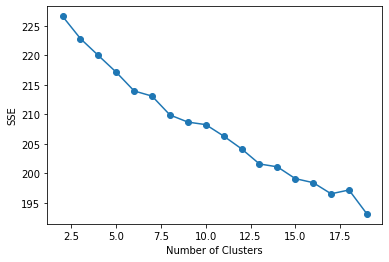

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def elbow(feature_vect):
    sse=[]
    for i in range(2, 20):
        km_cluster = KMeans(n_clusters=i, max_iter=10000, random_state=42)
        km_cluster.fit(feature_vect)
        sse.append(km_cluster.inertia_)
    plt.plot(range(2,20), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
elbow(feature_vect)

# 실루엣 계수(군집의 응집도)
## 값이 클수록 좋음

In [93]:
from sklearn.metrics.cluster import silhouette_score
sscore={}
for i in range(2, 10):
        km_cluster = KMeans(n_clusters=i, max_iter=10000, random_state=42)
        km_cluster.fit(feature_vect)
        cluster=km_cluster.labels_
        sscore[i]=silhouette_score(feature_vect,cluster)
print(max(sscore.values()))
print(sscore)

0.022568730277357712
{2: 0.018852798255237606, 3: 0.019190017952633677, 4: 0.019803212472864557, 5: 0.020941473321988542, 6: 0.022568730277357712, 7: 0.018884780116683212, 8: 0.021312383976340544, 9: 0.019951469990311718}


In [94]:
from sklearn.cluster import KMeans
km_cluster = KMeans(n_clusters=6, max_iter=10000, random_state=42)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [95]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,review_text,views,empathy,Sentiment,EV,cluster_label
0,0,...,144.0,67.0,0,46.527778,2
1,1,...,61.0,34.0,1,55.737705,1
2,2,...,54.0,21.0,1,38.888889,1
3,3,...,NaN,NaN,1,37.500000,5
4,4,I honestly dont know wtf the main character ...,228.0,188.0,1,82.456140,0


In [96]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape: ', cluster_centers.shape)
print(cluster_centers)# 4611은 feature의 개수 -> 0번 군집화에 대해서 어떤 것들이 가깝게 있는가(그 군집화를 대변함)

cluster_centers shape:  (6, 183)
[[0.01766617 0.013943   0.         ... 0.02950294 0.         0.03952177]
 [0.04645957 0.0127936  0.01451454 ... 0.02192763 0.01465213 0.00981813]
 [0.04452029 0.02559464 0.01287569 ... 0.01337525 0.01797472 0.02531074]
 [0.03857104 0.02106373 0.01799184 ... 0.00790951 0.00604028 0.01184521]
 [0.02880528 0.01006947 0.00649314 ... 0.         0.05176646 0.        ]
 [0.10020202 0.17251875 0.03178615 ... 0.         0.00381823 0.        ]]


In [97]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1] #높은순으로 0.8, 0.5, 0.3 -> 정렬된 인덱스값을 가져옴
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {} #{0:{}, 1:{}, 2:{}}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features] # 10개만 가져옴
        top_features = [ feature_names[ind] for ind in top_feature_indexes ] #top 10개 단어가 찾아짐
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함(값까지 찾음) 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
    
        
    return cluster_details

In [98]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Top features value:', cluster_detail['top_features_value'])
        print('==================================================')


In [99]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=6, top_n_features=5) # top5을 가져와라
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['old', 'old man', 'man', 'character', 'guy']
Top features value: [0.18444424139047458, 0.1589947675689511, 0.1585576807014969, 0.10888023325177426, 0.10554250907649039]
####### Cluster 1
Top features: ['character', 'korean', 'way', 'end', 'people']
Top features value: [0.07810482372035717, 0.07600701756317149, 0.06659624428383863, 0.06277794933649417, 0.05740671192816846]
####### Cluster 2
Top features: ['show', 'great', 'watch', 'netflix', 'good']
Top features value: [0.34054463827496506, 0.09308883772522779, 0.0803506915843846, 0.06771322960224198, 0.06339245407878152]
####### Cluster 3
Top features: ['series', 'squid', 'good', 'season', 'character']
Top features value: [0.31082356642360287, 0.06590575257001749, 0.06545292772963028, 0.06299701243677185, 0.062100206295723936]
####### Cluster 4
Top features: ['episode', 'last', 'last episode', 'show', 'season']
Top features value: [0.27390872519859033, 0.12188054930231368, 0.1096105658830004, 0.07101152

C:\Users\Tony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [83]:
clu0=document_df[document_df['cluster_label']==0]
clu1=document_df[document_df['cluster_label']==1]
clu2=document_df[document_df['cluster_label']==2]
clu3=document_df[document_df['cluster_label']==3]
clu4=document_df[document_df['cluster_label']==4]
clu5=document_df[document_df['cluster_label']==5]

In [84]:
clu0.to_csv("clu0.csv")
clu1.to_csv("clu1.csv")
clu2.to_csv("clu2.csv")
clu3.to_csv("clu3.csv")
clu4.to_csv("clu4.csv")
clu5.to_csv("clu5.csv")


# 상위 25프로 K-Means

# 상위 조회수 대비 공감비율은 시청자의 입장에서 영화를 아주 잘 설명해주는 데이터라고 판단하여 이것들의 집합으로 군집화를 또 돌려보도록 하겠다.

# 상위 25퍼센트 조회수 대비 공감비율들의 집합을 군집화 해서 전체 군집화와 비교 

In [100]:
document_df.drop(columns=['views','empathy','cluster_label'],inplace=True)

In [101]:
document_df['EV'].quantile([.75])

0.75    54.304245
Name: EV, dtype: float64

In [102]:
top=document_df[document_df['EV']>= 54.304245]

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words=stop_words, ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(top['review_text'])

# elbow

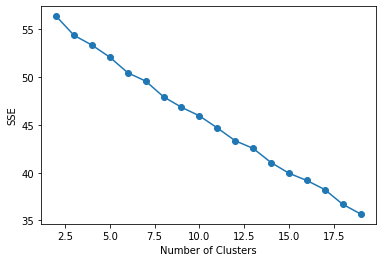

In [107]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def elbow(feature_vect):
    sse=[]
    for i in range(2, 20):
        km_cluster = KMeans(n_clusters=i, max_iter=10000, random_state=42)
        km_cluster.fit(feature_vect)
        sse.append(km_cluster.inertia_)
    plt.plot(range(2,20), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.savefig('elbow25.png')
    plt.show()
elbow(feature_vect)

# 실루엣

In [104]:
from sklearn.metrics.cluster import silhouette_score
sscore={}
for i in range(2, 15):
        km_cluster = KMeans(n_clusters=i, max_iter=10000, random_state=42)
        km_cluster.fit(feature_vect)
        cluster=km_cluster.labels_
        sscore[i]=silhouette_score(feature_vect,cluster)
print(max(sscore.values()))
print(sscore)

0.022930579508343384
{2: 0.018810112504652723, 3: 0.019295016551136652, 4: 0.007407383519793496, 5: 0.013553119482186281, 6: 0.020730163089823186, 7: 0.01665327437392266, 8: 0.022930579508343384, 9: 0.020115063873772668, 10: 0.011528649470397457, 11: 0.01793807566518074, 12: 0.02176050300433471, 13: 0.019822669339817644, 14: 0.020420264082582632}


In [108]:
from sklearn.cluster import KMeans
km_cluster = KMeans(n_clusters=8, max_iter=10000, random_state=42)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [109]:
top['cluster_label'] = cluster_label
top.head()

C:\Users\Tony\AppData\Local\Temp\ipykernel_47076\216480934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['cluster_label'] = cluster_label


,filename,review_text,Sentiment,EV,cluster_label
1,1,...,1,55.737705,1
4,4,I honestly dont know wtf the main character ...,1,82.456140,3
5,5,I loved it but three las...,0,66.051661,7
8,8,A great concept here as desperate people wit...,1,100.000000,4
15,15,A tentacular...,1,75.000000,6


In [110]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape: ', cluster_centers.shape)
print(cluster_centers)#군집화에 대해서 어떤 것들이 가깝게 있는가(그 군집화를 대변함)

cluster_centers shape:  (8, 208)
[[0.0334694  0.         0.09820616 ... 0.         0.         0.        ]
 [0.09934665 0.0945256  0.01846937 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.05694876 0.        ]
 ...
 [0.1894745  0.         0.         ... 0.         0.         0.        ]
 [0.02645724 0.0287576  0.         ... 0.01870972 0.02736264 0.02927581]
 [0.         0.02309751 0.         ... 0.         0.11687623 0.        ]]


In [111]:
feature_names

['acting',
 'actor',
 'alice',
 'amazing',
 'american',
 'around',
 'away',
 'back',
 'bad',
 'battle',
 'become',
 'believe',
 'best',
 'better',
 'big',
 'binge',
 'bit',
 'care',
 'cast',
 'character',
 'character development',
 'come',
 'concept',
 'could',
 'day',
 'death',
 'debt',
 'definitely',
 'development',
 'die',
 'different',
 'done',
 'drama',
 'emotion',
 'emotional',
 'end',
 'ending',
 'english',
 'enjoy',
 'enough',
 'entertaining',
 'episode',
 'especially',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'excellent',
 'expect',
 'far',
 'feel',
 'felt',
 'final',
 'find',
 'first',
 'first episode',
 'found',
 'fun',
 'give',
 'given',
 'go',
 'going',
 'good',
 'gore',
 'great',
 'guy',
 'half',
 'high',
 'however',
 'human',
 'hunger',
 'hype',
 'id',
 'idea',
 'interesting',
 'kind',
 'know',
 'korean',
 'last',
 'last episode',
 'let',
 'life',
 'liked',
 'little',
 'long',
 'look',
 'lot',
 'love',
 'loved',
 'made',
 'main',
 'main character',
 'make

In [112]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=8, top_n_features=5) # top5을 가져와라
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['royal', 'battle royal', 'battle', 'better', 'watched']
Top features value: [0.20626824040326244, 0.20626824040326244, 0.1725455333952561, 0.15496565884903477, 0.1359922241769557]
####### Cluster 1
Top features: ['show', 'great', 'good', 'watched', 'acting']
Top features value: [0.20035576791218362, 0.12168183543531486, 0.11378968855407053, 0.11175518847892416, 0.0993466467032157]
####### Cluster 2
Top features: ['episode', 'id', 'hype', 'season', 'someone']
Top features value: [0.36761913130574886, 0.14166360734341393, 0.1310173698965599, 0.11876397535137234, 0.11612212731899337]
####### Cluster 3
Top features: ['old man', 'guy', 'bad', 'character', 'old']
Top features value: [0.0830082005407092, 0.08134908710818439, 0.07991264215190012, 0.07788081265346554, 0.07779330611946884]
####### Cluster 4
Top features: ['end', 'episode', 'first', 'done', 'well']
Top features value: [0.23319590765204465, 0.19927305558251476, 0.13840135276257884, 0.12148541350196

C:\Users\Tony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [97]:
top[top['cluster_label']==1]

,filename,review_text,Sentiment,SV,cluster_label
1,1,...,1,55.737705,1
85,85,If youve already watched Alice in Wonderland...,1,69.767442,1
104,104,...,0,62.068966,1
126,126,I was blown away when I first started watchi...,1,57.142857,1
168,168,...,0,60.000000,1
192,192,"This show has a great script, excellent acto...",1,55.555556,1
211,211,One of the best shows Ive watched! Everyone ...,1,61.538462,1
213,213,Netflixs Squid Game Is AN ...,1,100.000000,1
241,241,...,1,66.666667,1
244,244,Absolutely brilliant! Loved it from start to...,1,67.500000,1


In [98]:
tclu0=top[top['cluster_label']==0]
tclu1=top[top['cluster_label']==1]
tclu2=top[top['cluster_label']==2]
tclu3=top[top['cluster_label']==3]
tclu4=top[top['cluster_label']==4]
tclu5=top[top['cluster_label']==5]
tclu6=top[top['cluster_label']==6]
tclu7=top[top['cluster_label']==7]

In [103]:
tclu4

,filename,review_text,Sentiment,SV,cluster_label
8,8,A great concept here as desperate people wit...,1,100.000000,4
132,132,...,0,79.518072,4
177,177,...,0,71.428571,4
214,214,...,1,100.000000,4
251,251,Wh...,1,75.000000,4


In [104]:
tclu0.to_csv("tclu0.csv")
tclu1.to_csv("tclu1.csv")
tclu2.to_csv("tclu2.csv")
tclu3.to_csv("tclu3.csv")
tclu4.to_csv("tclu4.csv")
tclu5.to_csv("tclu5.csv")
tclu6.to_csv("tclu6.csv")
tclu7.to_csv("tclu7.csv")

# 클러스터에 묶인 전체 단어를 LSTM에 넣고 처음 단어를 x로 준다.